<a href="https://colab.research.google.com/github/sabawi/getstockdata/blob/master/SP500_learning_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install fredapi

In [18]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import seaborn as sn
import fredapi as fa
import sklearn as sk
from datetime import datetime
from IPython.display import HTML
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

global myapi_key, econ_data

econ_data = {}

myapi_key = '4ebb60745e78caa3573b5a5f1e1924c8'

plt.style.use('dark_background')

# FRED Data Series ID identifies the dataset to retrieve 
FEDIDLIST = ["SP500","CORESTICKM159SFRBATL","DFF","CPIAUCSL","CPALTT01USM657N","PAYEMS","UNRATE","GDP"]

In [6]:
def merge_multiple_dfs(df_list):
  """
  Merge multiple time series of different intervals into a single Pandas DataFrame and forward fill the gaps in each column.

  Parameters:
    time_series_list (list): A list of Pandas Series objects, each representing a time series.

  Returns:
    Pandas DataFrame: A DataFrame containing the merged time series, with the gaps forward filled.
  """
  # Convert the time series list to a list of DataFrames
  #df_list = [series.to_frame(name=series.name) for series in time_series_list]

  # Merge the DataFrames into a single DataFrame
  df = pd.DataFrame()
  for id in df_list:
    df = df.merge(df_list[id], left_index=True, right_index=True, how='outer').ffill().dropna()

  #display(df)
  # Forward fill the gaps in the DataFrame
  #df = df.ffill()
  return df


In [7]:
def basic_dataframes_chart(df,title):
    fig, ax = plt.subplots(figsize=(16,8))

    df.plot(ax=ax,linewidth=3)

    ax.set_title(title)
    ax.title.set_size(20)

    ax.set_xlabel(df.index.name)
    ax.set_ylabel(':'.join(str(a) for a in df.columns.to_list()))

    ax.grid(True,which='both', axis='both')
    ax.legend(df.keys())

    plt.show()
    

In [10]:
def update_econ_data(fred_sid_list=FEDIDLIST, fred_start_date=None,fed_end_date=None):

    global myapi_key,econ_data
    
    econ_data = {}
    
    fred = fa.Fred(api_key= myapi_key )

    if(not fred_start_date):
        fred_start_date = "2019-01-01"

    if(not fed_end_date):
        fred_end_date = datetime.today()

    for id in fred_sid_list:
        info = fred.get_series_info(id)
        econ_data[id]= fred.get_series(id,fred_start_date,fred_end_date).to_frame()
        econ_data[id].columns = [info['title']]
        #print(econ_data[id].index)
        #basic_dataframes_chart(econ_data[id],info['title'])


#update_econ_data()
#merge_multiple_dfs(econ_data)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


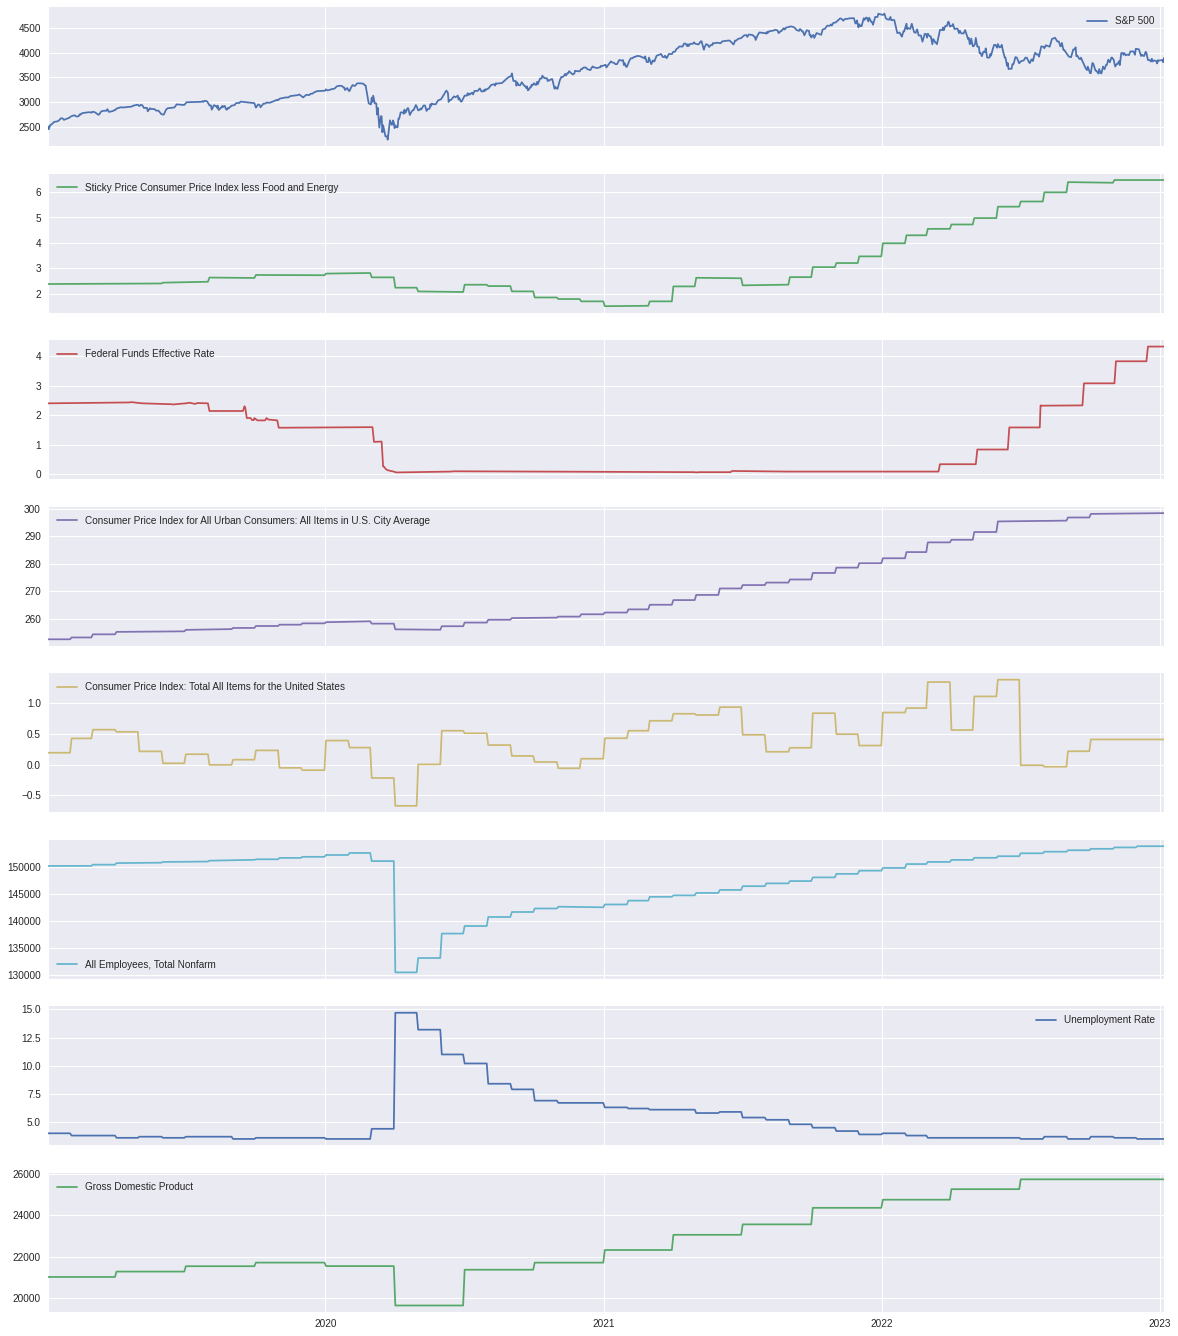

In [21]:
def multiplot_df(df,plot_cols):
  plot_features = df[plot_cols]
  _ = plot_features.plot(subplots=True,figsize=(20,24))

update_econ_data()
data = merge_multiple_dfs(econ_data)
plot_cols = data.columns.to_list()

print(plt.style.available)
plt.style.use('fast')
multiplot_df(data,plot_cols)


In [11]:
def preprocess_data():
  # Update and load updated data
  update_econ_data()
  data = merge_multiple_dfs(econ_data)

  X = data
  dx = X.describe().transpose()
  display(dx)

  y = data['S&P 500']

  # Scale the features to the range [0, 1]
  scaler = MinMaxScaler()
  X = scaler.fit_transform(X)
  
  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # display(y)

  # Build the neural network model
  model = Sequential()
  model.add(Dense(10, input_dim=8, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fit the model to the training data
  model.fit(X_train, y_train, epochs=10, batch_size=32)

  # Evaluate the model on the test data
  score = model.evaluate(X_test, y_test, batch_size=32)
  print('Test MSE:', score)

  # Use the model to make predictions on new data

  # Must create future data into X_new to prodict the Target
  #predictions = model.predict(X_new)

preprocess_data()



,count,mean,std,min,25%,50%,75%,max
S&P 500,1466.0,3626.776412,632.225416,2237.400000,3006.722500,3688.635000,4179.332500,4796.560000
Sticky Price Consumer Price Index less Food and Energy,1466.0,3.174094,1.453563,1.504532,2.325734,2.623896,3.982988,6.475764
Federal Funds Effective Rate,1466.0,1.087033,1.186620,0.040000,0.080000,0.330000,2.330000,4.330000
Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,1466.0,269.671986,15.186812,252.470000,257.305000,262.200000,281.933000,298.349000
Consumer Price Index: Total All Items for the United States,1466.0,0.373170,0.393692,-0.668694,0.082296,0.351649,0.547438,1.373608
"All Employees, Total Nonfarm",1466.0,147818.277626,5305.566154,130513.000000,144694.000000,150348.000000,151589.000000,153743.000000
Unemployment Rate,1466.0,5.191064,2.537295,3.500000,3.600000,3.800000,6.100000,14.700000
Gross Domestic Product,1466.0,22794.710640,1832.336075,19636.731000,21531.839000,22313.850000,24740.480000,25723.941000


Epoch 1/10
37/37 [==============================] - 1s 2ms/step - loss: 13502579.0000
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 13500763.0000
Epoch 3/10
37/37 [==============================] - 0s 2ms/step - loss: 13498445.0000
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 13495537.0000
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 13491991.0000
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 13487779.0000
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 13482882.0000
Epoch 8/10
37/37 [==============================] - 0s 2ms/step - loss: 13477317.0000
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 13471096.0000
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 13703508.0000
Test MSE: 13703508.0
